# Create the corpus

In [ ]:
!pip install pymupdf
import fitz
import nltk.data
import re
nltk.download('punkt')
nltk.download('words')

     |████████████████████████████████| 6.0MB 2.4MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Write content of 'E_376.pdf' to 'dataset.txt'
doc = fitz.open("E_376.pdf")
f = open("dataset.txt", "a")

for page_no in range(20, 64):
  page = doc[page_no].getText()
  f.write(page)

f.close()

In [ ]:
def word_exists(word):
    """Checks if word is a valid English word or not.
    :param word: str word to be checked
    :return: boolean value; True, if words exists in English dictionary else False"""
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    if word.lower() in english_vocab:
        return True
    else:
        return False
        

def replace_incomplete_words(text):
    """Replace words like 'Mainten- ance' with 'Maintenance'
    :param text: list of str containing texts to process
    :return: list of str after processing all the texts"""
    processed = []
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for item in text:
        count = item.count("- ")
        while count > 0:
            try:
              first_half = item.split("- ")[0].split()[-1]
              second_half = item.split("- ")[1].split()[0]
              original_second_half = second_half
              if second_half[-1] in punctuations:
                  second_half = second_half[:-1]  # If word contains punctuation in the last, remove it.
              word_without = first_half + second_half
              if word_exists(word_without.lower()):
                  item = item.replace((first_half + "- " + original_second_half), first_half + original_second_half, 1)
              else:
                  item = item.replace((first_half + "- " + original_second_half), first_half + "-" + original_second_half, 1)
            except:
              pass
            count -= 1
        processed.append(item)
    return processed


def preprocess(text):
    """Returns text after preprocessing
    :param text: str text to preprocess
    :return: str text after preprocessing"""
    # If row comprises just any of words like caution, warning, note, etc. remove them
    if text.lower() in ["caution", "note", "warning", "danger", "— —", "-", ",", ".", "•", "—"]: return None
    # If row comprises of words like 'C H A P T E R 5', remove them
    if len(re.findall(r"^c h a p t e r [0-9] *[0-9]*$", text.lower())) > 0: return None
    # If row does not contain any letter, remove them i.e, remove phone numbers, fax numbers, etc
    if len(re.findall(r"[^a-zA-Z]", text)) == len(text): return None
    # If row starts with section number e.g., 5.4.3 remove section number
    if len(re.findall(r"^[0-9]*\.*[0-9]*\.*[0-9]*\.*[0-9]*\.*[0-9]*\.[0-9]$", text.split()[0])) > 0:
        text = " ".join(text.split()[1:])
    # Replace words like 'Mainten- ance' with 'Maintenance'
    text = replace_incomplete_words([text])[0]
    # Replace sentences where each word have an empty string ' ' between each letter
    if text.count(" ") > len(text) * 0.45:
        sent = ""
        for i in text.split("  "):
            word = "".join(i.split(" "))
            sent = sent + word + " "
        text = sent.strip()
    return text

In [ ]:
# Read content of 'dataset.txt' and preprocess it
foo = open("dataset.txt", "r")
file_content = []
for line in foo:
  text = preprocess(line)
  if text is not None:
    file_content.append(text.replace("\n", ""))

foo.close()

In [ ]:
file_content[:30]

['C',
 'H',
 'A',
 'P',
 'T',
 'E',
 'R',
 'Introduction',
 'This chapter describes the outline, purpose, and organization of this manual, and other information',
 'necessary for using this manual. It also includes contact information and important notices.',
 'About the Contents of This Manual 10377M.20140201',
 'The manuals provided with this system include the information about the installation, operation, and',
 'preventive maintenance for TEL manufactured equipment as well as its support equipment. Please',
 'keep the manuals in a location close to the equipment so that it is easily accessible when it is needed.',
 'Some of the manuals are separated into volumes according to purpose and contents and the users are',
 'required to refer to other related manuals. Please use the manuals after understanding the content and',
 'how to use each manual.',
 'WARNING   General',
 'Do not perform any tasks other than as described in this manual. TEL accepts no responsibility for dam-',
 'age

In [ ]:
# Break down lines into sentences
sent_detector = nltk.data.load('nltk:tokenizers/punkt/english.pickle')
corpus = sent_detector.tokenize(" ".join(file_content))

In [ ]:
corpus[:30]

['C H A P T E R Introduction This chapter describes the outline, purpose, and organization of this manual, and other information necessary for using this manual.',
 'It also includes contact information and important notices.',
 'About the Contents of This Manual 10377M.20140201 The manuals provided with this system include the information about the installation, operation, and preventive maintenance for TEL manufactured equipment as well as its support equipment.',
 'Please keep the manuals in a location close to the equipment so that it is easily accessible when it is needed.',
 'Some of the manuals are separated into volumes according to purpose and contents and the users are required to refer to other related manuals.',
 'Please use the manuals after understanding the content and how to use each manual.',
 'WARNING   General Do not perform any tasks other than as described in this manual.',
 'TEL accepts no responsibility for dam- age arising because the tasks were performed other 

In [ ]:
def preprocess_corpus(corpus):
  temp = []
  for text in corpus:
    text = text.replace("C H A P T E R", "Chapter")
    temp.append(text)
  return temp

In [ ]:
corpus = preprocess_corpus(corpus)
corpus[:30]

['Chapter Introduction This chapter describes the outline, purpose, and organization of this manual, and other information necessary for using this manual.',
 'It also includes contact information and important notices.',
 'About the Contents of This Manual 10377M.20140201 The manuals provided with this system include the information about the installation, operation, and preventive maintenance for TEL manufactured equipment as well as its support equipment.',
 'Please keep the manuals in a location close to the equipment so that it is easily accessible when it is needed.',
 'Some of the manuals are separated into volumes according to purpose and contents and the users are required to refer to other related manuals.',
 'Please use the manuals after understanding the content and how to use each manual.',
 'WARNING   General Do not perform any tasks other than as described in this manual.',
 'TEL accepts no responsibility for dam- age arising because the tasks were performed other than a

# Start building the model

In [ ]:
# Let's start building the model
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Flatten, TimeDistributed, Dropout, LSTMCell, RNN, Bidirectional, Concatenate, Layer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.utils import tf_utils
from tensorflow.keras import backend as K

import unicodedata
import re
import numpy as np
import os
import time
import shutil

import pandas as pd
import numpy as np
import string, os 
tf.__version__

'2.3.0'

In [ ]:
def generate_dataset(corpus):  
    output = []
    for line in corpus:
        token_list = line
        for i in range(1, len(token_list)):
            data = []
            x_ngram = '<start> '+ token_list[:i+1] + ' <end>'
            y_ngram = '<start> '+ token_list[i+1:] + ' <end>'
            data.append(x_ngram)
            data.append(y_ngram)
            output.append(data)
    print("Dataset prepared with prefix and suffixes for teacher forcing technique")
    dummy_df = pd.DataFrame(output, columns=['input','output'])
    return output, dummy_df          

In [ ]:
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()
    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))
        self.vocab = sorted(self.vocab)
        self.word2idx["<pad>"] = 0
        self.idx2word[0] = "<pad>"
        for i,word in enumerate(self.vocab):
            self.word2idx[word] = i + 1
            self.idx2word[i+1] = word

def max_length(t):
    return max(len(i) for i in t)

def load_dataset(corpus):
    pairs, df = generate_dataset(corpus)
    out_lang = LanguageIndex(sp for en, sp in pairs)
    in_lang = LanguageIndex(en for en, sp in pairs)
    input_data = [[in_lang.word2idx[s] for s in en.split(' ')] for en, sp in pairs]
    output_data = [[out_lang.word2idx[s] for s in sp.split(' ')] for en, sp in pairs]
    
    max_length_in, max_length_out = max_length(input_data), max_length(output_data)
    input_data = tf.keras.preprocessing.sequence.pad_sequences(input_data, maxlen=max_length_in, padding="post")
    output_data = tf.keras.preprocessing.sequence.pad_sequences(output_data, maxlen=max_length_out, padding="post")
    return input_data, output_data, in_lang, out_lang, max_length_in, max_length_out, df

In [ ]:
input_data, teacher_data, input_lang, target_lang, len_input, len_target, df = load_dataset(corpus)


target_data = [[teacher_data[n][i+1] for i in range(len(teacher_data[n])-1)] for n in range(len(teacher_data))]
target_data = tf.keras.preprocessing.sequence.pad_sequences(target_data, maxlen=len_target, padding="post")
target_data = target_data.reshape((target_data.shape[0], target_data.shape[1], 1))

# Shuffle all of the data in unison. 
p = np.random.permutation(len(input_data))
input_data = input_data[p]
teacher_data = teacher_data[p]
target_data = target_data[p]

Dataset prepared with prefix and suffixes for teacher forcing technique


In [ ]:
pd.set_option('display.max_colwidth', -1)
BUFFER_SIZE = len(input_data)
BATCH_SIZE = 64
embedding_dim = 300
units = 128
vocab_in_size = len(input_lang.word2idx)
vocab_out_size = len(target_lang.word2idx)
df.iloc[60:70]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,input,output
60,"<start> Chapter Introduction This chapter describes the outline, purpo <end>","<start> se, and organization of this manual, and other information necessary for using this manual. <end>"
61,"<start> Chapter Introduction This chapter describes the outline, purpos <end>","<start> e, and organization of this manual, and other information necessary for using this manual. <end>"
62,"<start> Chapter Introduction This chapter describes the outline, purpose <end>","<start> , and organization of this manual, and other information necessary for using this manual. <end>"
63,"<start> Chapter Introduction This chapter describes the outline, purpose, <end>","<start> and organization of this manual, and other information necessary for using this manual. <end>"
64,"<start> Chapter Introduction This chapter describes the outline, purpose, <end>","<start> and organization of this manual, and other information necessary for using this manual. <end>"
65,"<start> Chapter Introduction This chapter describes the outline, purpose, a <end>","<start> nd organization of this manual, and other information necessary for using this manual. <end>"
66,"<start> Chapter Introduction This chapter describes the outline, purpose, an <end>","<start> d organization of this manual, and other information necessary for using this manual. <end>"
67,"<start> Chapter Introduction This chapter describes the outline, purpose, and <end>","<start> organization of this manual, and other information necessary for using this manual. <end>"
68,"<start> Chapter Introduction This chapter describes the outline, purpose, and <end>","<start> organization of this manual, and other information necessary for using this manual. <end>"
69,"<start> Chapter Introduction This chapter describes the outline, purpose, and o <end>","<start> rganization of this manual, and other information necessary for using this manual. <end>"


In [ ]:
# Create the Encoder layers first.
encoder_inputs = Input(shape=(len_input,))
encoder_emb = Embedding(input_dim=vocab_in_size, output_dim=embedding_dim)

# Create the Bidirectional LSTM
encoder_lstm = Bidirectional(LSTM(units=units, return_sequences=True, return_state=True))
encoder_out, fstate_h, fstate_c, bstate_h, bstate_c = encoder_lstm(encoder_emb(encoder_inputs))
state_h = Concatenate()([fstate_h,bstate_h])
state_c = Concatenate()([bstate_h,bstate_c])
encoder_states = [state_h, state_c]


# Now create the Decoder layers.
decoder_inputs = Input(shape=(None,))
decoder_emb = Embedding(input_dim=vocab_out_size, output_dim=embedding_dim)
decoder_lstm = LSTM(units=units*2, return_sequences=True, return_state=True)
decoder_lstm_out, _, _ = decoder_lstm(decoder_emb(decoder_inputs), initial_state=encoder_states)
# Two dense layers added to this model to improve inference capabilities.
decoder_d1 = Dense(units, activation="relu")
decoder_d2 = Dense(vocab_out_size, activation="softmax")
decoder_out = decoder_d2(Dropout(rate=.2)(decoder_d1(Dropout(rate=.2)(decoder_lstm_out))))


# Finally, create a training model which combines the encoder and the decoder.
# Note that this model has three inputs:
model = Model(inputs = [encoder_inputs, decoder_inputs], outputs= decoder_out)

# We'll use sparse_categorical_crossentropy so we don't have to expand decoder_out into a massive one-hot array.
# Adam is used because it's, well, the best.
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 362)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 362, 300)     2477700     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 362, 256), ( 439296      embedding[0][0]                  
_______________________________________________________________________________________

In [ ]:
# Use 20% of our data for validation.
epochs = 10
history = model.fit([input_data, teacher_data], target_data,
                 batch_size= BATCH_SIZE,
                 epochs=epochs,
                 validation_split=0.2)

Epoch 1/10
660/660 [==============================] - 613s 929ms/step - loss: 0.5669 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.1879 - val_sparse_categorical_accuracy: 0.9660
Epoch 2/10
660/660 [==============================] - 612s 927ms/step - loss: 0.1414 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9857
Epoch 3/10
660/660 [==============================] - 614s 931ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0508 - val_sparse_categorical_accuracy: 0.9910
Epoch 4/10
660/660 [==============================] - 615s 931ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.0408 - val_sparse_categorical_accuracy: 0.9931
Epoch 5/10
660/660 [==============================] - 616s 933ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0347 - val_sparse_categorical_accuracy: 0.9940
Epoch 6/10
660/660 [==============================] - 614s 931ms/step - loss: 0.

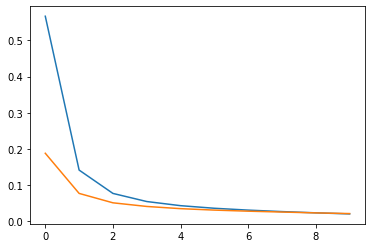

In [ ]:
# Plot the results of the training.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.show()

In [ ]:
# Create the encoder model from the tensors we previously declared.
encoder_model = Model(encoder_inputs, [encoder_out, state_h, state_c])

# Generate a new set of tensors for our new inference decoder. Note that we are using new tensors, 
# this does not preclude using the same underlying layers that we trained on. (e.g. weights/biases).

inf_decoder_inputs = Input(shape=(None,), name="inf_decoder_inputs")
# We'll need to force feed the two state variables into the decoder each step.
state_input_h = Input(shape=(units*2,), name="state_input_h")
state_input_c = Input(shape=(units*2,), name="state_input_c")
decoder_res, decoder_h, decoder_c = decoder_lstm(
    decoder_emb(inf_decoder_inputs), 
    initial_state=[state_input_h, state_input_c])
inf_decoder_out = decoder_d2(decoder_d1(decoder_res))
inf_model = Model(inputs=[inf_decoder_inputs, state_input_h, state_input_c], 
                  outputs=[inf_decoder_out, decoder_h, decoder_c])

In [ ]:
# Converts the given sentence (just a string) into a vector of word IDs
# Output is 1-D: [timesteps/words]

def sentence_to_vector(sentence, lang):

    pre = sentence
    vec = np.zeros(len_input)
    sentence_list = [lang.word2idx[s] for s in pre.split(' ')]
    for i,w in enumerate(sentence_list):
        vec[i] = w
    return vec

# Given an input string, an encoder model (infenc_model) and a decoder model (infmodel),
def translate(input_sentence, infenc_model, infmodel):
    sv = sentence_to_vector(input_sentence, input_lang)
    sv = sv.reshape(1,len(sv))
    [emb_out, sh, sc] = infenc_model.predict(x=sv)
    
    i = 0
    start_vec = target_lang.word2idx["<start>"]
    stop_vec = target_lang.word2idx["<end>"]
    
    cur_vec = np.zeros((1,1))
    cur_vec[0,0] = start_vec
    cur_word = "<start>"
    output_sentence = ""

    while cur_word != "<end>" and i < (len_target-1):
        i += 1
        if cur_word != "<start>":
            output_sentence = output_sentence + " " + cur_word
        x_in = [cur_vec, sh, sc]
        [nvec, sh, sc] = infmodel.predict(x=x_in)
        cur_vec[0,0] = np.argmax(nvec[0,0])
        cur_word = target_lang.idx2word[np.argmax(nvec[0,0])]
    return output_sentence

In [ ]:
#Note that only words that we've trained the model on will be available, otherwise you'll get an error.


test = [
    'the phrase process execution',
    'theory of',
    'characteristics of the',
    'process module',
]
  

import pandas as pd
output = []  
for t in test:  
  output.append({"Input seq":t.lower(), "Pred. Seq":translate(t.lower(), encoder_model, inf_model)})

results_df = pd.DataFrame.from_dict(output) 
results_df.head(len(test))

,Input seq,Pred. Seq
0,the phrase process execution,on the Reference for Customer Options Maintenance Manual Safety Manual and Safety and Environmental Guidelines c_opsmaintprocessdoc_kai_e CAUTION General TEL provides TEL Safety and Environmental Guidelines and Safety Manuals to establish a basic knowl- edge of important safety and environmental concerns.
1,theory of,the process manuals are separated into volumes according to purpose and contents and the users are required to refer to other related manuals.
2,characteristics of the,the process module and the process chamber.
3,process module,"the dielectric plate and the ESC is called the gap, the distance of which cannot be changed."


In [ ]:
# This is to save the model for the web app to use for generation
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = inf_model.to_json()


with open("./sample_data/model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
inf_model.save_weights("./sample_data/model_num.h5")